# Deep Learning Model
We are aiming to predict the Lip_norm parameter based on the binary positions and full embedding of a peptide.

## Dataset preparation

### Read and prepare embeddings
Read generated embeddings from the pkl file, that was generated in notebook 2.

In [1]:
import json
import pickle
import pandas as pd

def load_and_process_embedding(file_path):
    with open(file_path, 'rb') as file:
        embeddings = pickle.load(file)
    embeddings = pd.DataFrame(embeddings)
    embeddings.set_index('Uniprot_ID', inplace=True)
    embeddings = embeddings.drop(columns=['full_sequence'])
    return embeddings

embeddings = pd.DataFrame()

embedding_files = [
    'data/embeddings_new.pkl'
]

for file_path in embedding_files:
    current_embeddings = load_and_process_embedding(file_path)
    embeddings = pd.concat([embeddings, current_embeddings])

In [2]:
embeddings

,Qvalue(LiP),padded_sequence,full_sequence_length,num_pad_tokens,padded_sequence_length,expected_padded_length,full_embedding
Uniprot_ID,,,,,,,
P15703,0.003686,MRFSTTLATAATALFFTASQVSAIGELAFNLGVKNNDGTCKSTSDY...,313,687,1000,1000,"[[0.10360906273126602, -0.04516144096851349, 0..."
P15703,0.034862,MRFSTTLATAATALFFTASQVSAIGELAFNLGVKNNDGTCKSTSDY...,313,687,1000,1000,"[[0.10360906273126602, -0.04516144096851349, 0..."
P15703,0.039093,MRFSTTLATAATALFFTASQVSAIGELAFNLGVKNNDGTCKSTSDY...,313,687,1000,1000,"[[0.10360906273126602, -0.04516144096851349, 0..."
P15703,0.042584,MRFSTTLATAATALFFTASQVSAIGELAFNLGVKNNDGTCKSTSDY...,313,687,1000,1000,"[[0.10360906273126602, -0.04516144096851349, 0..."
P15703,0.048552,MRFSTTLATAATALFFTASQVSAIGELAFNLGVKNNDGTCKSTSDY...,313,687,1000,1000,"[[0.10360906273126602, -0.04516144096851349, 0..."
...,...,...,...,...,...,...,...
Q00055,0.292011,MSAAADRLNLTSGHLNAGRKRSSSSVSLKAAEKPFKVTVIGSGNWG...,391,609,1000,1000,"[[0.06122666597366333, 0.011665030382573605, 0..."
Q00055,0.361558,MSAAADRLNLTSGHLNAGRKRSSSSVSLKAAEKPFKVTVIGSGNWG...,391,609,1000,1000,"[[0.06122666597366333, 0.011665030382573605, 0..."
P49626,0.007762,MSRPQVTVHSLTGEATANALPLPAVFSAPIRPDIVHTVFTSVNKNK...,362,638,1000,1000,"[[0.03739340975880623, 0.008485470898449421, 0..."


In [3]:
import numpy as np

# Creating trimmed embeddings: because of the first and last tokens
# (https://www.science.org/doi/suppl/10.1126/science.ade2574/suppl_file/science.ade2574_sm.pdf)
# We used BOS and EOS tokens to signal the beginning and end of a real protein, to allow the model to separate a full-sized protein from a cropped one.
trimmed_embeddings = [np.array(embedding)[1:-1, :] for embedding in embeddings['full_embedding']]
trimmed_embeddings_df = pd.DataFrame({'embeddings': trimmed_embeddings}, index=embeddings.index)

In [4]:
# We can see that we have the trimmed embedings ready to be used
trimmed_embeddings_df.head()

,embeddings
Uniprot_ID,
P15703,"[[-0.0004594324855133891, -0.04933467134833336..."
P15703,"[[-0.0004594324855133891, -0.04933467134833336..."
P15703,"[[-0.0004594324855133891, -0.04933467134833336..."
P15703,"[[-0.0004594324855133891, -0.04933467134833336..."
P15703,"[[-0.0004594324855133891, -0.04933467134833336..."


### Read Binary position data
Read generated binary position data and target values from the csv file, that was generated in notebook 1. The data is already ready, which means that the binary position  is already padded to the length of one thousand.

In [5]:
# Get the dataset
df = pd.read_csv('data/OsmoticStress_with_binary_positions_padded.csv')
df['Binary_Positions'] = df['Binary_Positions'].apply(json.loads)
df['Padded_Binary_Positions'] = df['Padded_Binary_Positions'].apply(json.loads)
df.drop(columns=['full_sequence', 'Peptide_sequence', "Binary_Positions"], inplace=True)
df.set_index('Uniprot_ID', inplace=True)

df.head()

,Log2FC(LiP_norm),Padded_Binary_Positions
Uniprot_ID,,
P15703,-2.176707,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
P15703,0.285029,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
P15703,-0.498240,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
P15703,0.348193,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
P15703,-0.434615,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."


### Prepare training dataset
Merge both embeddings and padded binary position together.

In [6]:
dataset = df.merge(trimmed_embeddings_df, left_index=True, right_index=True)

# We can see that we have only the columns: 'Lip_norm', 'Binary Position', 'Embeddings'
dataset.head()
print(dataset.shape)

(43166, 3)


In [7]:
# Reduce data quantity for memory's sake
# dataset = dataset[:8000]
dataset = dataset.sample(n=6000, random_state=42)

In [8]:
import torch
import numpy as np

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
# Create tensors directly on the GPU
embeddings_tensor = torch.tensor(np.array(dataset['embeddings'].tolist(), dtype=np.float16), device=device)
binary_positions_tensor = torch.tensor(np.array(dataset['Padded_Binary_Positions'].tolist(), dtype=np.float16), device=device)

In [9]:
print("embeddings_tensor shape", embeddings_tensor.shape)
print("binary_positions_tensor shape", binary_positions_tensor.shape)

embeddings_tensor shape torch.Size([6000, 1000, 1280])
binary_positions_tensor shape torch.Size([6000, 1000])


In [10]:
y = torch.tensor(np.array(dataset['Log2FC(LiP_norm)'].tolist(), dtype=np.float16), device=device)

print("y shape:", y.shape)

y shape: torch.Size([6000])


## Model Training
Now that we have both input and target data, we can create our model.

In [11]:
import torch
print(torch.__version__)
print(device)

1.13.1+cu116
cuda


In [12]:
import torch
import torch.nn as nn
import torch.optim as optim
import copy
from torch.utils.data import TensorDataset, DataLoader, random_split, Dataset
from torch.cuda.amp import GradScaler, autocast

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Data setup
class PeptideDataset(Dataset):
    def __init__(self, embeddings, position, y):
        self.embeddings = torch.tensor(embeddings, dtype = torch.float16)
        self.position = torch.tensor(position, dtype = torch.int64)
        self.y = torch.tensor(y, dtype = torch.float16)
        
    def __len__(self):
        return len(self.y)
    
    def __getitem__(self, index):
        x = {"embeddings":self.embeddings[index],
             "position":self.position[index]}
        y = self.y[index]
        return x, y

dataset = PeptideDataset(embeddings_tensor, binary_positions_tensor, y)

train_size = int(0.6 * len(dataset))
val_size = int(0.2 * len(dataset))
test_size = len(dataset) - train_size - val_size

train_dataset, val_dataset, test_dataset = random_split(dataset, [train_size, val_size, test_size])

/data/nasif12/home_if12/l_schewinski/.conda/envs/l-schewinski-tp-2/lib/python3.7/site-packages/ipykernel_launcher.py:13: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  del sys.path[0]
/data/nasif12/home_if12/l_schewinski/.conda/envs/l-schewinski-tp-2/lib/python3.7/site-packages/ipykernel_launcher.py:14: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  
/data/nasif12/home_if12/l_schewinski/.conda/envs/l-schewinski-tp-2/lib/python3.7/site-packages/ipykernel_launcher.py:15: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  from ipykernel import kern

In [23]:
batch_size = 32

train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

# Model definition
class PeptideRegressor(nn.Module):
    def __init__(self, input_dim, num_heads, dropout_rate):
        super(PeptideRegressor, self).__init__()
        self.pos_embed = nn.Embedding(2, 1280)
        encoder_layer = nn.TransformerEncoderLayer(
            d_model=input_dim, 
            nhead=num_heads, 
            dropout=dropout_rate
        )
        self.transformer_encoder = nn.TransformerEncoder(encoder_layer, num_layers=1)
        
        
        self.pooling = nn.AdaptiveAvgPool1d(1)
        self.fc = nn.Linear(input_dim, 1)

    def forward(self, x):
        x = x["embeddings"] + self.pos_embed(x["position"])
        x = x.permute(1, 0, 2)
        transformer_output = self.transformer_encoder(x)
        transformer_output = transformer_output.permute(1, 2, 0)
        pooled = self.pooling(transformer_output)
        flattened = pooled.squeeze(-1)
        output = self.fc(flattened)
        return output

model = PeptideRegressor(input_dim=1280, num_heads=16, dropout_rate=0.1)
model = model.to(device)

loss_fn = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.0005) #, weight_decay=1e-3)

scaler = GradScaler()

# Training settings
n_epochs = 35
best_val_loss = float('inf')
train_losses_avg = []
val_losses_avg = []

# Training loop
for epoch in range(n_epochs):
    model.train()
    train_losses = []
    for X_batch, y_batch in train_loader:
        for k, v in X_batch.items():
            X_batch[k] = v.to(device, non_blocking=True)
        y_batch = y_batch.to(device, non_blocking=True)

        optimizer.zero_grad()

        # Using AMP for automatic mixed precision
        with autocast():
            y_pred = model(X_batch)
            loss = loss_fn(y_pred, y_batch.unsqueeze(1))

        # Backpropagation with scaled loss
        scaler.scale(loss).backward()
        scaler.step(optimizer)
        scaler.update()

        train_losses.append(loss.item())

    train_losses_avg.append(sum(train_losses) / len(train_losses))
    print(f'Epoch {epoch+1}, Train Loss: {train_losses_avg[-1]}')

    model.eval()
    val_losses = []
    for X_batch, y_batch in val_loader:
        for k, v in X_batch.items():
            X_batch[k] = v.to(device, non_blocking=True)
        y_batch = y_batch.to(device, non_blocking=True)

        with torch.no_grad(), autocast():
            y_pred = model(X_batch)
            mse = loss_fn(y_pred, y_batch.unsqueeze(1))
            val_losses.append(mse.item())

    avg_val_loss = sum(val_losses) / len(val_losses)
    val_losses_avg.append(avg_val_loss)
    print(f'Epoch {epoch+1}, Val MSE: {avg_val_loss}')
    if avg_val_loss < best_val_loss:
        best_val_loss = avg_val_loss
        best_model = copy.deepcopy(model.state_dict())

torch.save({
    'model_state_dict': best_model,
}, 'best_peptide_model.pth')

Epoch 1, Train Loss: 12.561600517250795
Epoch 1, Val MSE: 0.4367726413827193
Epoch 2, Train Loss: 0.40768889166348804
Epoch 2, Val MSE: 0.41706781795150355
Epoch 3, Train Loss: 0.33752547731969207
Epoch 3, Val MSE: 0.255137190614876
Epoch 4, Train Loss: 0.28126933550940153
Epoch 4, Val MSE: 0.2435075515194943
Epoch 5, Train Loss: 0.1947562246196038
Epoch 5, Val MSE: 0.26370706566070257
Epoch 6, Train Loss: 0.1762744932707432
Epoch 6, Val MSE: 0.1552033491040531
Epoch 7, Train Loss: 0.16850904329160674
Epoch 7, Val MSE: 0.2054114343696519
Epoch 8, Train Loss: 0.19136872007387928
Epoch 8, Val MSE: 0.201222265433324
Epoch 9, Train Loss: 0.13271344795954965
Epoch 9, Val MSE: 0.13264993842887252
Epoch 10, Train Loss: 0.1218425127455091
Epoch 10, Val MSE: 0.16594948149041125
Epoch 11, Train Loss: 0.13160935706928767
Epoch 11, Val MSE: 0.13182585451163745
Epoch 12, Train Loss: 0.1196023422927983
Epoch 12, Val MSE: 0.12359360409410376
Epoch 13, Train Loss: 0.09161220972253158
Epoch 13, Val MSE

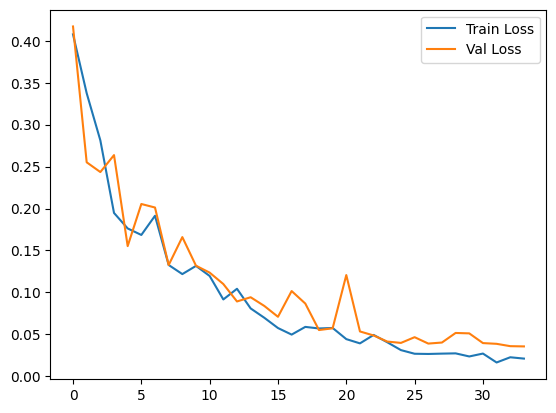

In [26]:
# # Visualize the training process
import matplotlib.pyplot as plt

plt.plot(train_losses_avg[1:], label='Train Loss')
plt.plot(val_losses_avg[1:], label='Val Loss')
plt.legend()
plt.show()


In [29]:
def model_summary(model):
    print("Model Summary:")
    print("{:<50} {:<30} {:<15} {:<15}".format("Layer Name", "Shape", "Parameters", "Trainable"))
    print("-" * 110)
    total_params = 0
    total_trainable_params = 0
    lm_params = 0
    lm_trainable_params = 0
    lm_layers = 0
    for name, parameter in model.named_parameters():
        param = parameter.numel()
        total_params += param
        # Check if the parameter is trainable
        trainable = parameter.requires_grad
        trainable_param = param if trainable else 0
        total_trainable_params += trainable_param
        print("{:<50} {:<30} {:<15} {:<15}".format(name, str(parameter.size()), param, trainable_param))
    print("-" * 110)
    print(f"Total Parameters: {total_params}")
    print(f"Trainable Parameters: {total_trainable_params}")

model_summary(model)

Model Summary:
Layer Name                                         Shape                          Parameters      Trainable      
--------------------------------------------------------------------------------------------------------------
pos_embed.weight                                   torch.Size([2, 1280])          2560            2560           
transformer_encoder.layers.0.self_attn.in_proj_weight torch.Size([3840, 1280])       4915200         4915200        
transformer_encoder.layers.0.self_attn.in_proj_bias torch.Size([3840])             3840            3840           
transformer_encoder.layers.0.self_attn.out_proj.weight torch.Size([1280, 1280])       1638400         1638400        
transformer_encoder.layers.0.self_attn.out_proj.bias torch.Size([1280])             1280            1280           
transformer_encoder.layers.0.linear1.weight        torch.Size([2048, 1280])       2621440         2621440        
transformer_encoder.layers.0.linear1.bias          torch.Size([204

In [27]:
model.load_state_dict(best_model)
model.eval()
test_losses = []
y_preds = []
y_actuals = []

for X_batch, y_batch in test_loader:
    for k, v in X_batch.items():
        X_batch[k] = v.to(device, non_blocking=True)
    y_batch = y_batch.to(device, non_blocking=True)
    
    with torch.no_grad(), autocast():
        y_pred = model(X_batch)
        mse = loss_fn(y_pred, y_batch.unsqueeze(1))
        
        y_preds.extend(y_pred.cpu().numpy())
        y_actuals.extend(y_batch.cpu().numpy())
        test_losses.append(mse.item())

avg_test_loss = sum(test_losses) / len(test_losses)
print(f'Test MSE: {avg_test_loss}')

Test MSE: 0.02741298135860186


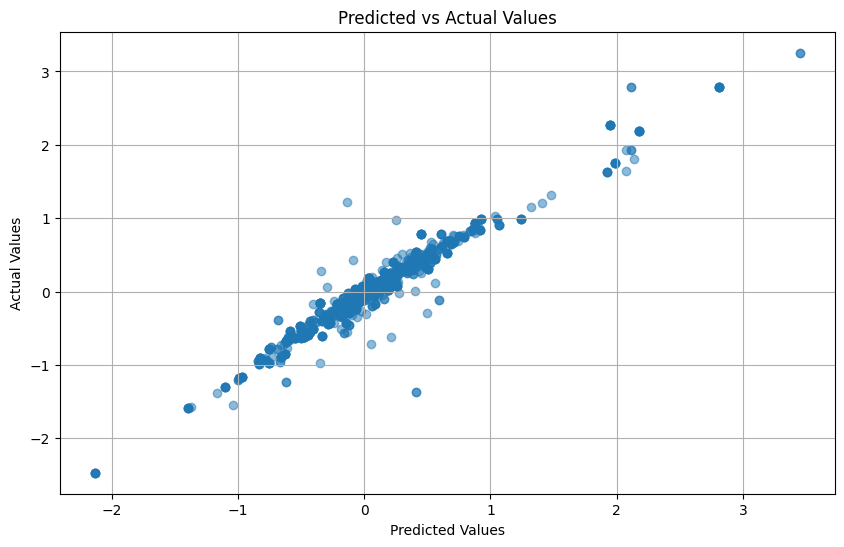

In [28]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.scatter(y_preds, y_actuals, alpha=0.5)
plt.title('Predicted vs Actual Values')
plt.ylabel('Actual Values')
plt.xlabel('Predicted Values')
plt.grid(True)
plt.show()